In [1]:

library(lmtest)
library(quantreg)
library(MASS)
library(faraway)
library(tidyverse)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: SparseM


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()



In [2]:
# 7.8 a)
fat_model1 <- lm(brozek ~ age + weight + height + neck + chest + abdom + hip + thigh + knee + ankle + biceps + forearm + wrist, data = fat)
summary(fat_model1)
print(vif(fat_model1))


Call:
lm(formula = brozek ~ age + weight + height + neck + chest + 
    abdom + hip + thigh + knee + ankle + biceps + forearm + wrist, 
    data = fat)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.264  -2.572  -0.097   2.898   9.327 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15.29255   16.06992  -0.952  0.34225    
age           0.05679    0.02996   1.895  0.05929 .  
weight       -0.08031    0.04958  -1.620  0.10660    
height       -0.06460    0.08893  -0.726  0.46830    
neck         -0.43754    0.21533  -2.032  0.04327 *  
chest        -0.02360    0.09184  -0.257  0.79740    
abdom         0.88543    0.08008  11.057  < 2e-16 ***
hip          -0.19842    0.13516  -1.468  0.14341    
thigh         0.23190    0.13372   1.734  0.08418 .  
knee         -0.01168    0.22414  -0.052  0.95850    
ankle         0.16354    0.20514   0.797  0.42614    
biceps        0.15280    0.15851   0.964  0.33605    
forearm       0.43049    0.18445   2

      age    weight    height      neck     chest     abdom       hip     thigh 
 2.250450 33.509320  1.674591  4.324463  9.460877 11.767073 14.796520  7.777865 
     knee     ankle    biceps   forearm     wrist 
 4.612147  1.907961  3.619744  2.192492  3.377515 


## 8.1

Researchers at National Institutes of Standards and Technology (NIST) collected pipeline data on  
ultrasonic measurements of the depth of defects in the Alaska pipeline in the field. The depth  
of the defects were then remeasured in the lab- oratory. These measurements were performed in six  
different batches. It turns out that this batch effect is not significant and so can be ignored  
in the analysis that follows. The laboratory measurements are more accurate than the in-field  
measurements, but more time consuming and expensive. We want to develop a regression equation for  
correcting the in-field measurements.  
(a) Fit a regression model Lab ~ Field. Check for non-constant variance.  
(b) We wish to use weights to account for the non-constant variance.  
    Here we split the range of Field into 12 groups of size nine (except  
    for the last group which has only eight values). Within each group,  
    we compute the variance of Lab as varlab and the mean of Field as meanfield.  
    Supposing pipeline is the name of your data frame, the following R code will  
    make the needed computations:  
    
    ```
    i <- order(pipeline$Field)  
    npipe <- pipeline[i,]  
    ff <- gl(12,9)[-108]  
    meanfield <- unlist(lapply(split(npipe$Field,ff),mean))  
    varlab <- unlist(lapply(split(npipe$Lab,ff),var))
    ```


Call:
lm(formula = Lab ~ Field, data = pipeline)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.985  -4.072  -1.431   2.504  24.334 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.96750    1.57479  -1.249    0.214    
Field        1.22297    0.04107  29.778   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.865 on 105 degrees of freedom
Multiple R-squared:  0.8941,	Adjusted R-squared:  0.8931 
F-statistic: 886.7 on 1 and 105 DF,  p-value: < 2.2e-16


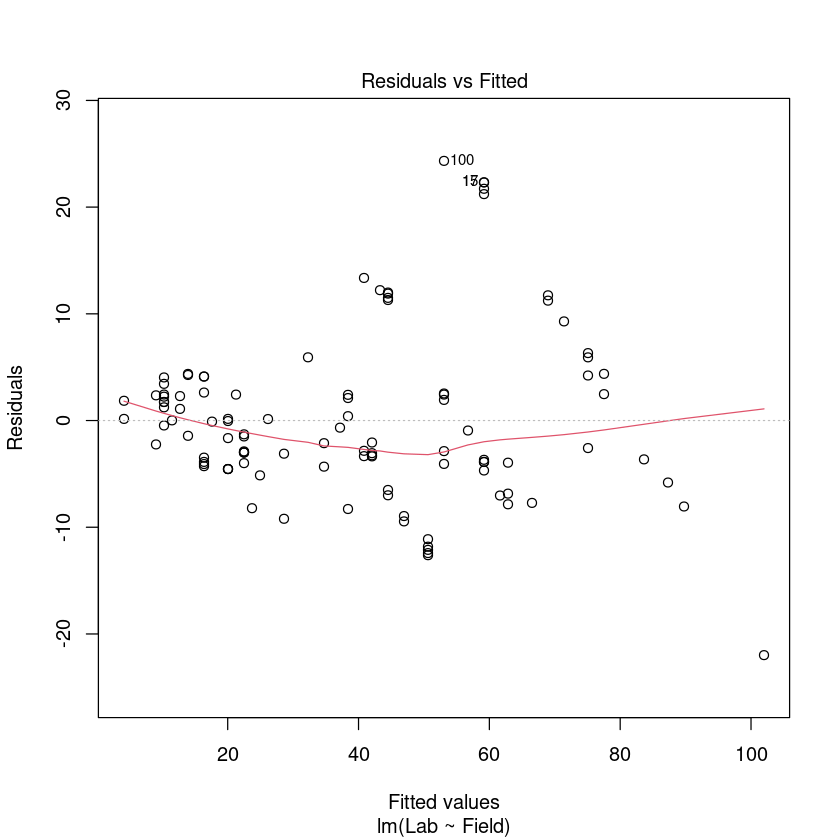

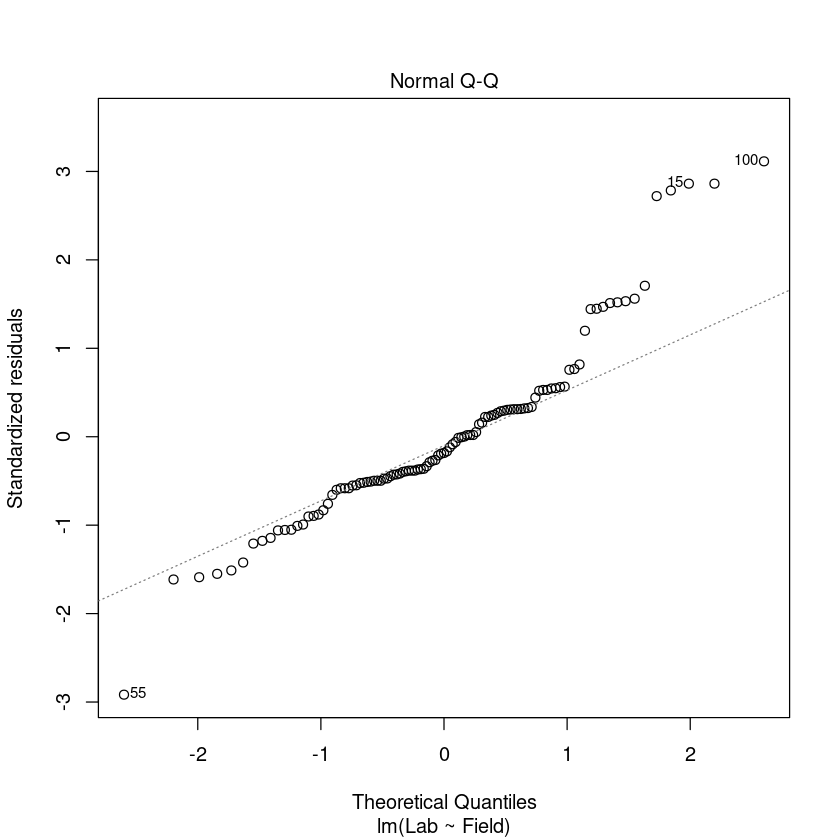

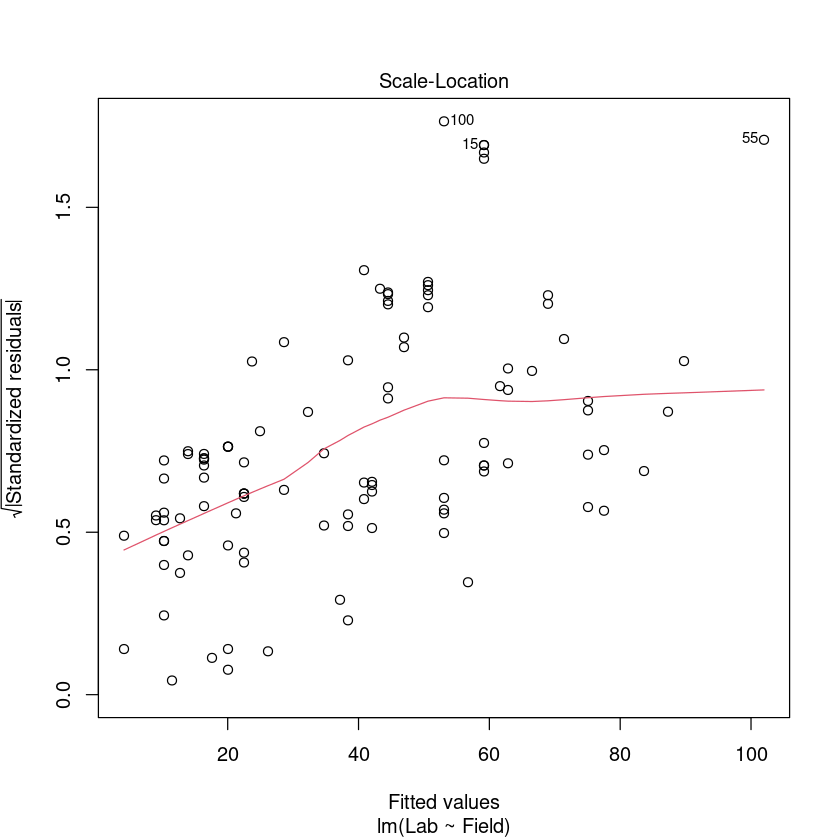

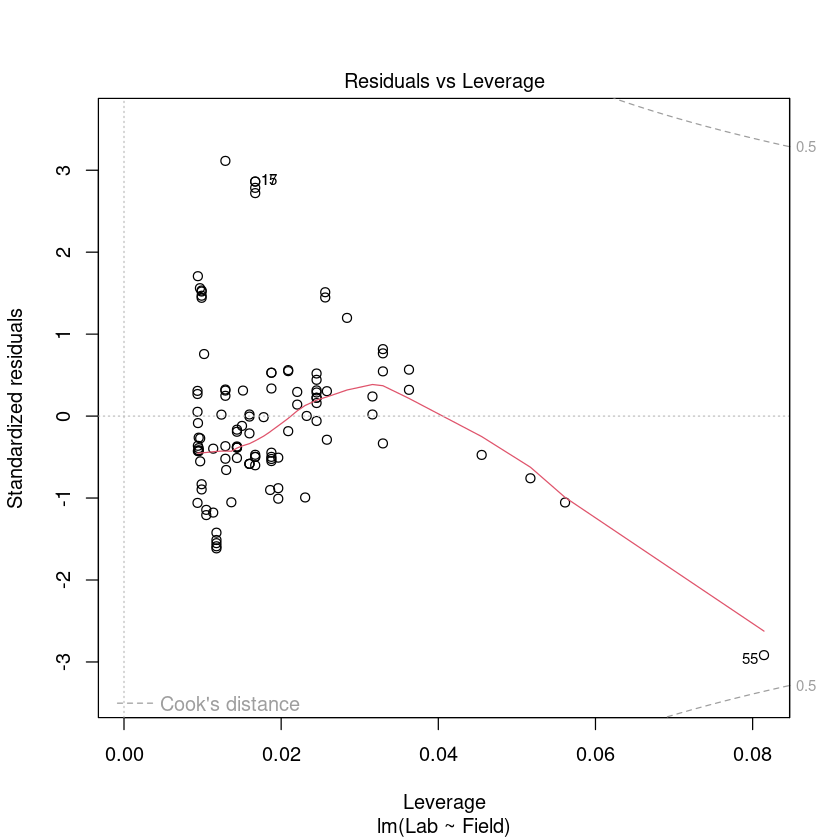

In [3]:
# LMR 8.1 
pipe_model1 <- lm(Lab ~ Field, data = pipeline)
summary(pipe_model1)
plot(pipe_model1)

The residual versus fitted value plot indicates fanning, so the variance does is likely not constant.

In [4]:
#b)
i <- order(pipeline$Field) 
npipe <- pipeline[i,] 
ff <- gl(12,9)[-108] 
meanfield <- unlist(lapply(split(npipe$Field,ff),mean)) 
varlab <- unlist(lapply(split(npipe$Lab,ff),var))


Call:
lm(formula = log(varlab) ~ log(meanfield))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2038 -0.6729  0.1656  0.7205  1.1891 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)     -0.3538     1.5715  -0.225   0.8264  
log(meanfield)   1.1244     0.4617   2.435   0.0351 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.018 on 10 degrees of freedom
Multiple R-squared:  0.3723,	Adjusted R-squared:  0.3095 
F-statistic: 5.931 on 1 and 10 DF,  p-value: 0.03513


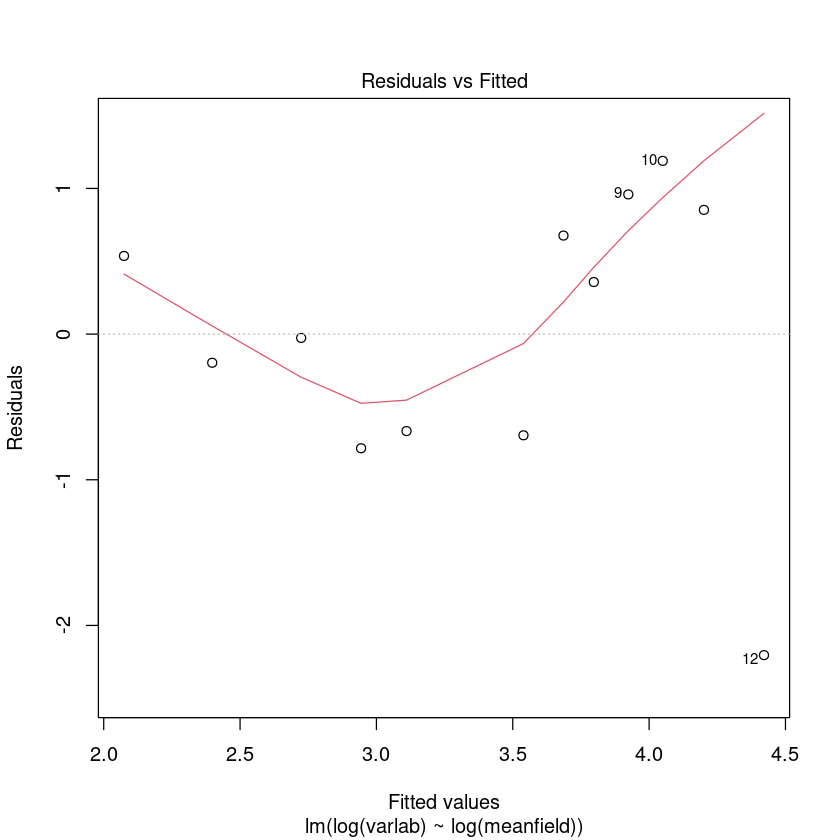

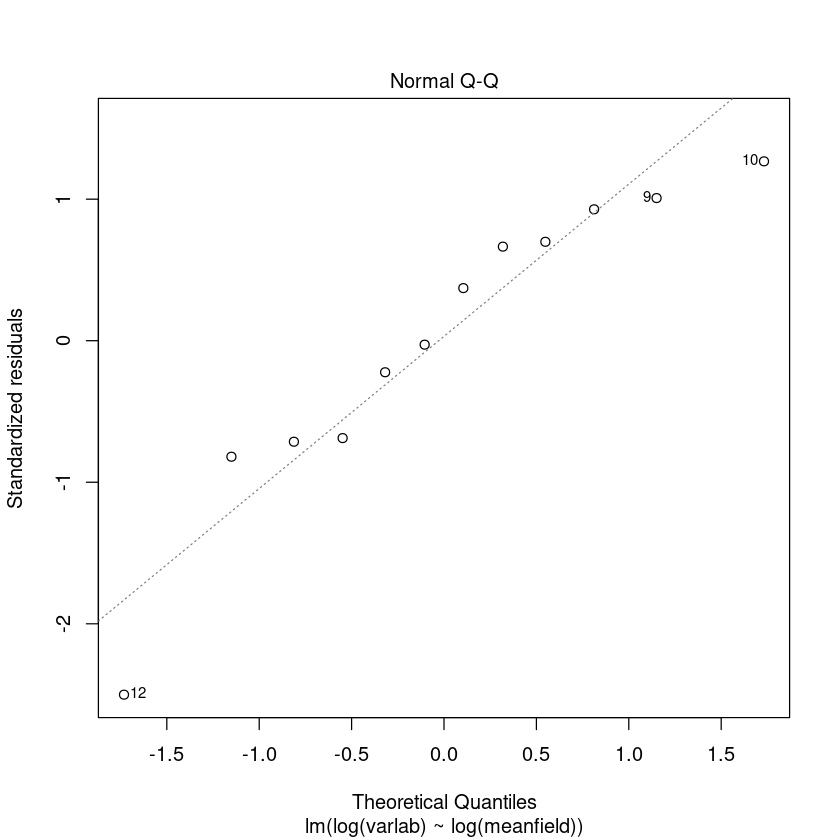

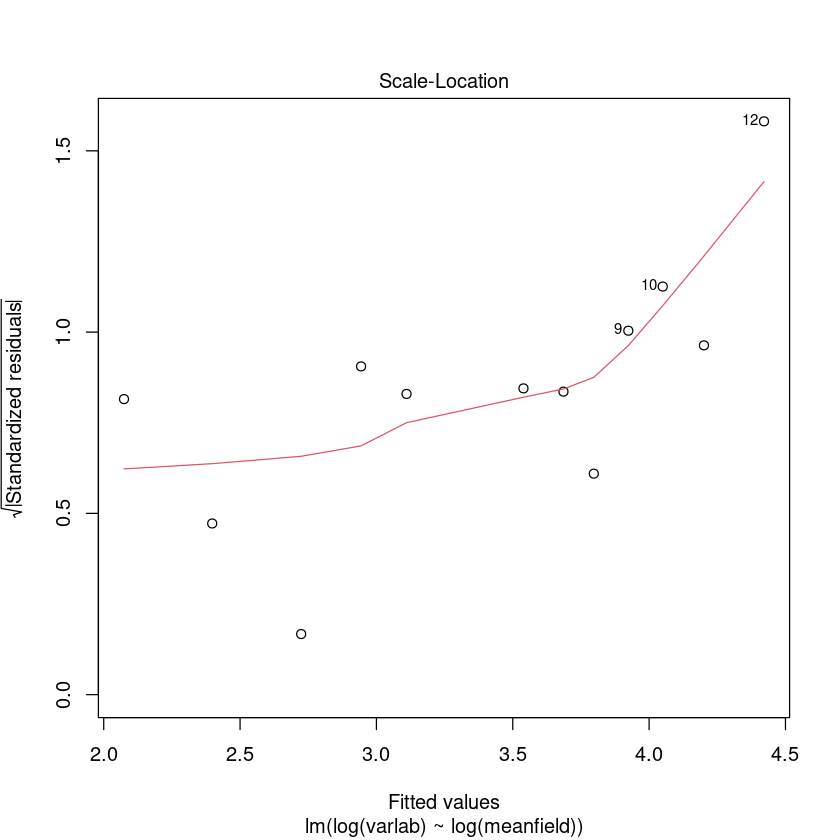

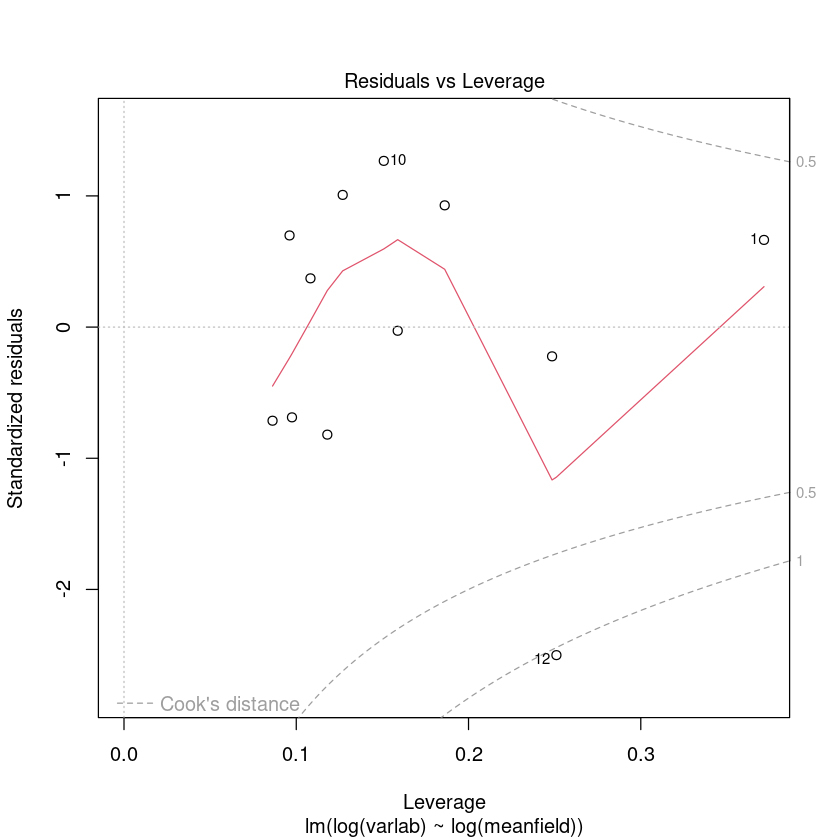

In [5]:
pipe_model2 <- lm(log(varlab) ~ log(meanfield))
summary(pipe_model2)
plot(pipe_model2)


## LMR 8.5 
Using the stackloss data, fit a model with stack.loss  
as the response and the other three variables as  
predictors using the following methods:  
(a) Least squares  
(b) Least absolute deviations  
(c) Huber method  
(d) Least trimmed squares Compare the results.  
    Now use diagnostic methods to detect any outliers or influential points. 
    Remove these points and then use least squares. Compare the results.

In [6]:
# LMR 8.5 

stackloss %>% head()

,Air.Flow,Water.Temp,Acid.Conc.,stack.loss
,<dbl>,<dbl>,<dbl>,<dbl>
1,80,27,89,42
2,80,27,88,37
3,75,25,90,37
4,62,24,87,28
5,62,22,87,18
6,62,23,87,18


In [7]:
#a)
stack_model1 <- lm(stack.loss ~ ., data = stackloss)
summary(stack_model1)


Call:
lm(formula = stack.loss ~ ., data = stackloss)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2377 -1.7117 -0.4551  2.3614  5.6978 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -39.9197    11.8960  -3.356  0.00375 ** 
Air.Flow      0.7156     0.1349   5.307  5.8e-05 ***
Water.Temp    1.2953     0.3680   3.520  0.00263 ** 
Acid.Conc.   -0.1521     0.1563  -0.973  0.34405    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.243 on 17 degrees of freedom
Multiple R-squared:  0.9136,	Adjusted R-squared:  0.8983 
F-statistic:  59.9 on 3 and 17 DF,  p-value: 3.016e-09


In [8]:
#b)
stack_model2 <- rq(stack.loss ~ ., data = stackloss)
summary(stack_model2)


Call: rq(formula = stack.loss ~ ., data = stackloss)

tau: [1] 0.5

Coefficients:
            coefficients lower bd  upper bd 
(Intercept) -39.68986    -41.61973 -29.67754
Air.Flow      0.83188      0.51278   1.14117
Water.Temp    0.57391      0.32182   1.41090
Acid.Conc.   -0.06087     -0.21348  -0.02891

In [9]:
#c)
stack_model3 <- rlm(stack.loss ~ ., data = stackloss)
summary(stack_model3)


Call: rlm(formula = stack.loss ~ ., data = stackloss)
Residuals:
     Min       1Q   Median       3Q      Max 
-8.91753 -1.73127  0.06187  1.54306  6.50163 

Coefficients:
            Value    Std. Error t value 
(Intercept) -41.0265   9.8073    -4.1832
Air.Flow      0.8294   0.1112     7.4597
Water.Temp    0.9261   0.3034     3.0524
Acid.Conc.   -0.1278   0.1289    -0.9922

Residual standard error: 2.441 on 17 degrees of freedom

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


The following objects are masked from ‘package:faraway’:

    logit, vif




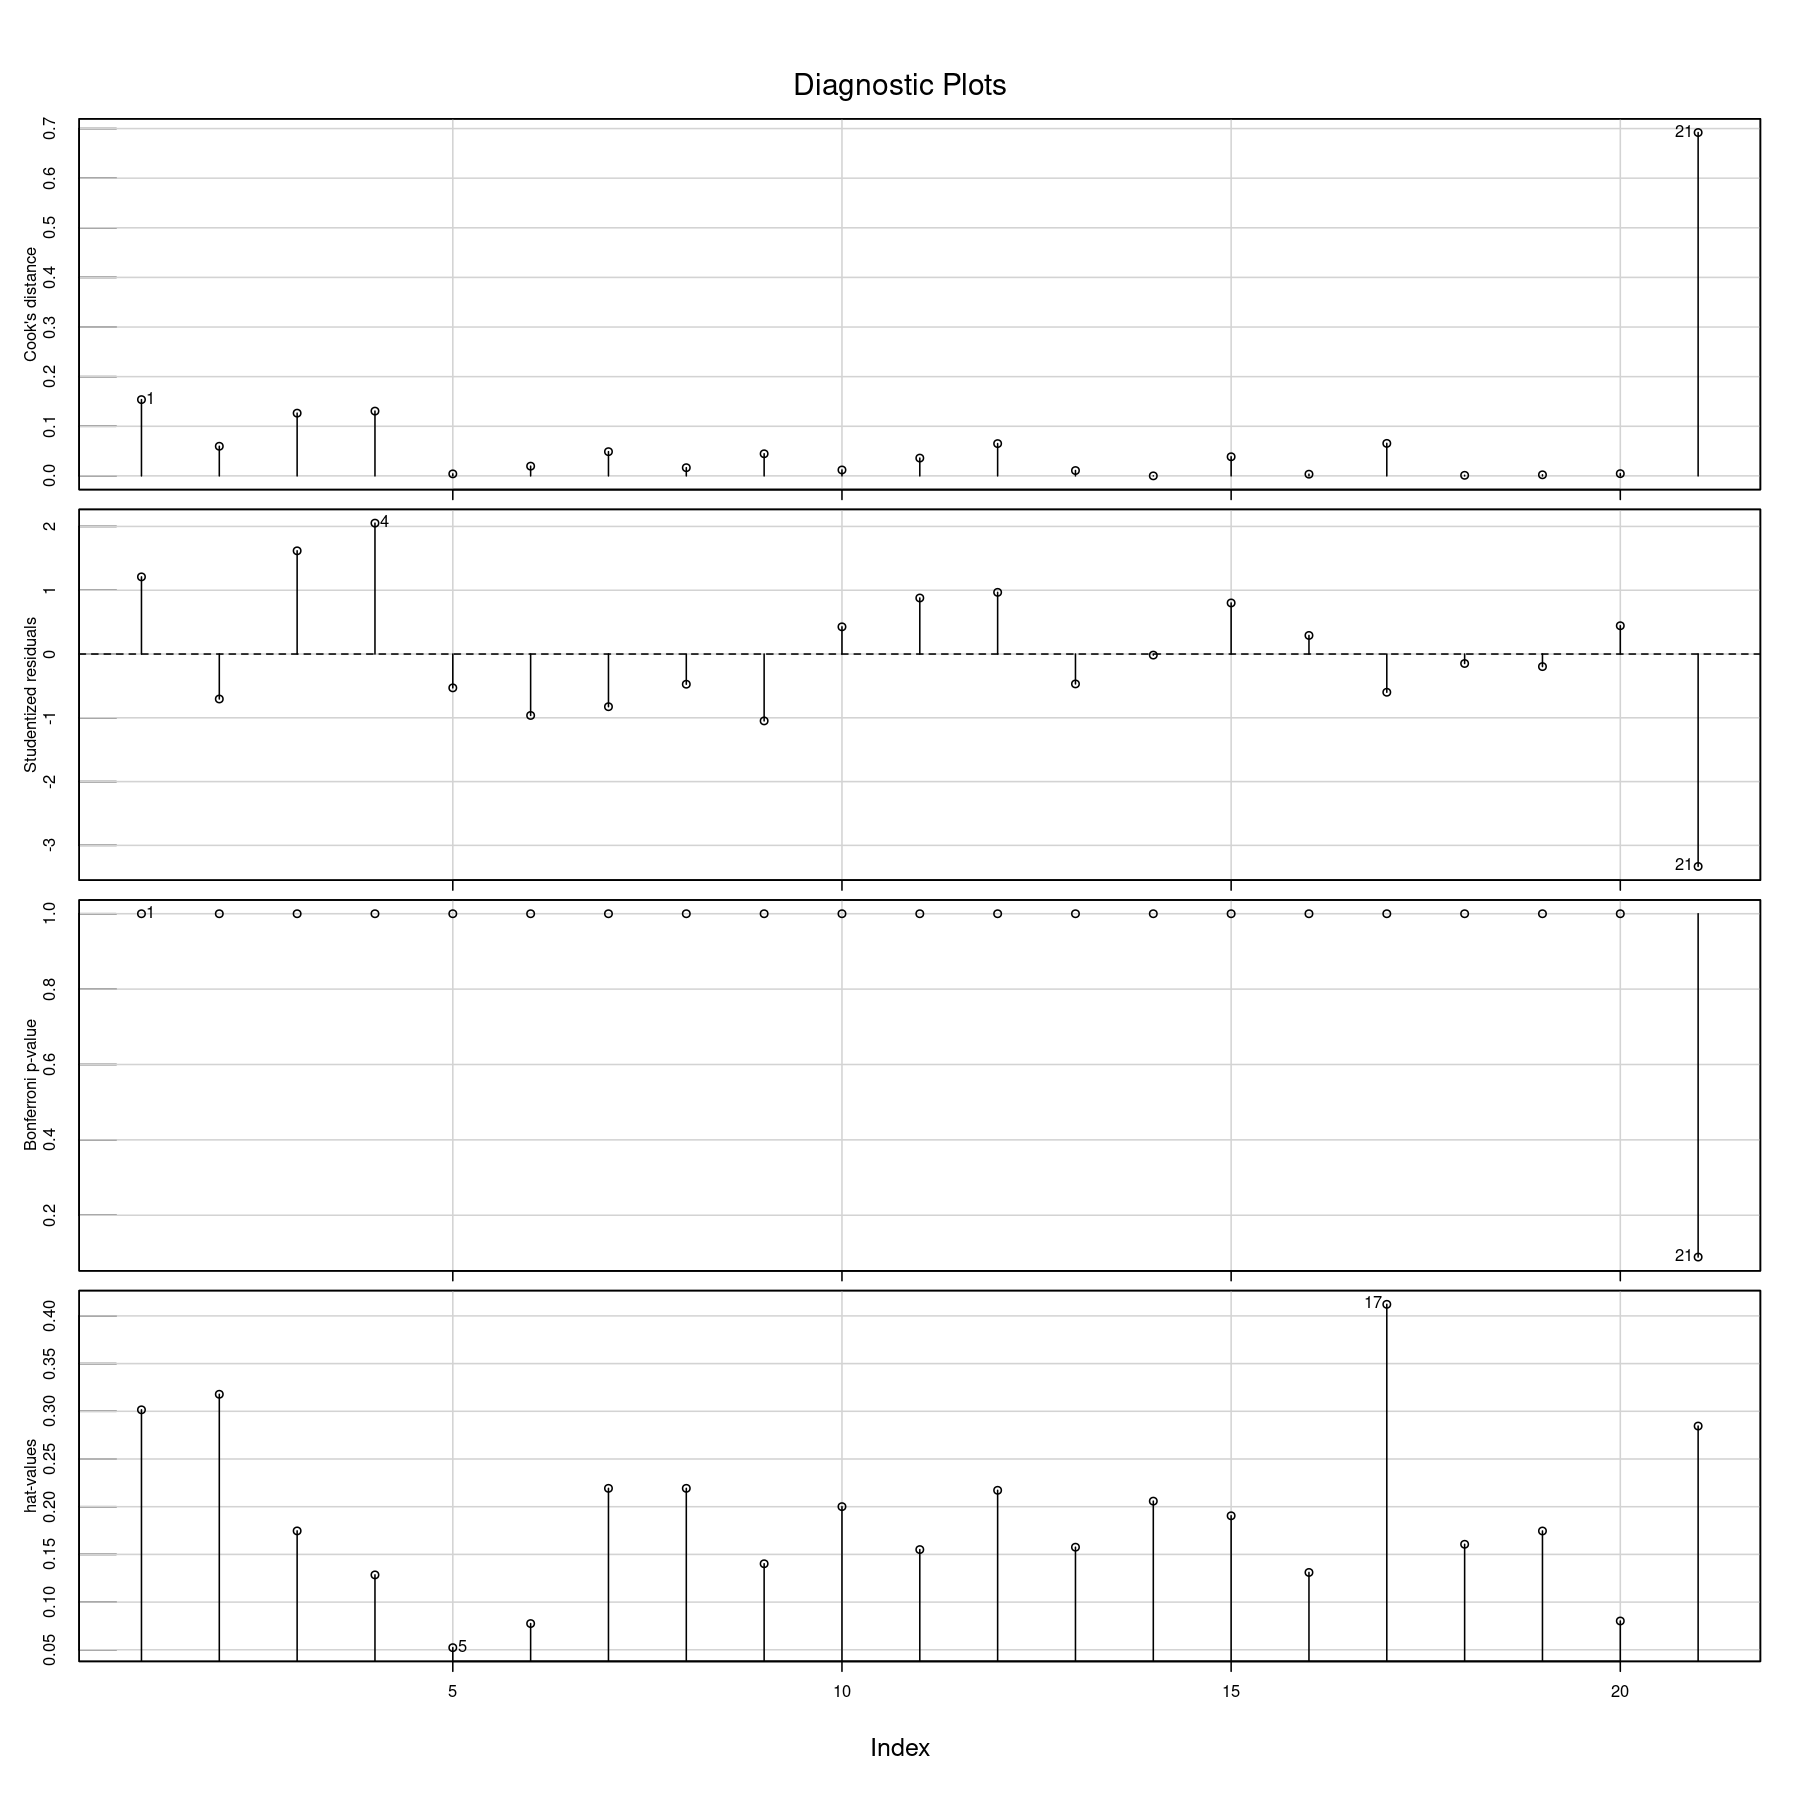

In [10]:
library(car)
options(repr.plot.width = 12, repr.plot.height = 12, repr.plot.res = 150)
influenceIndexPlot(stack_model1)

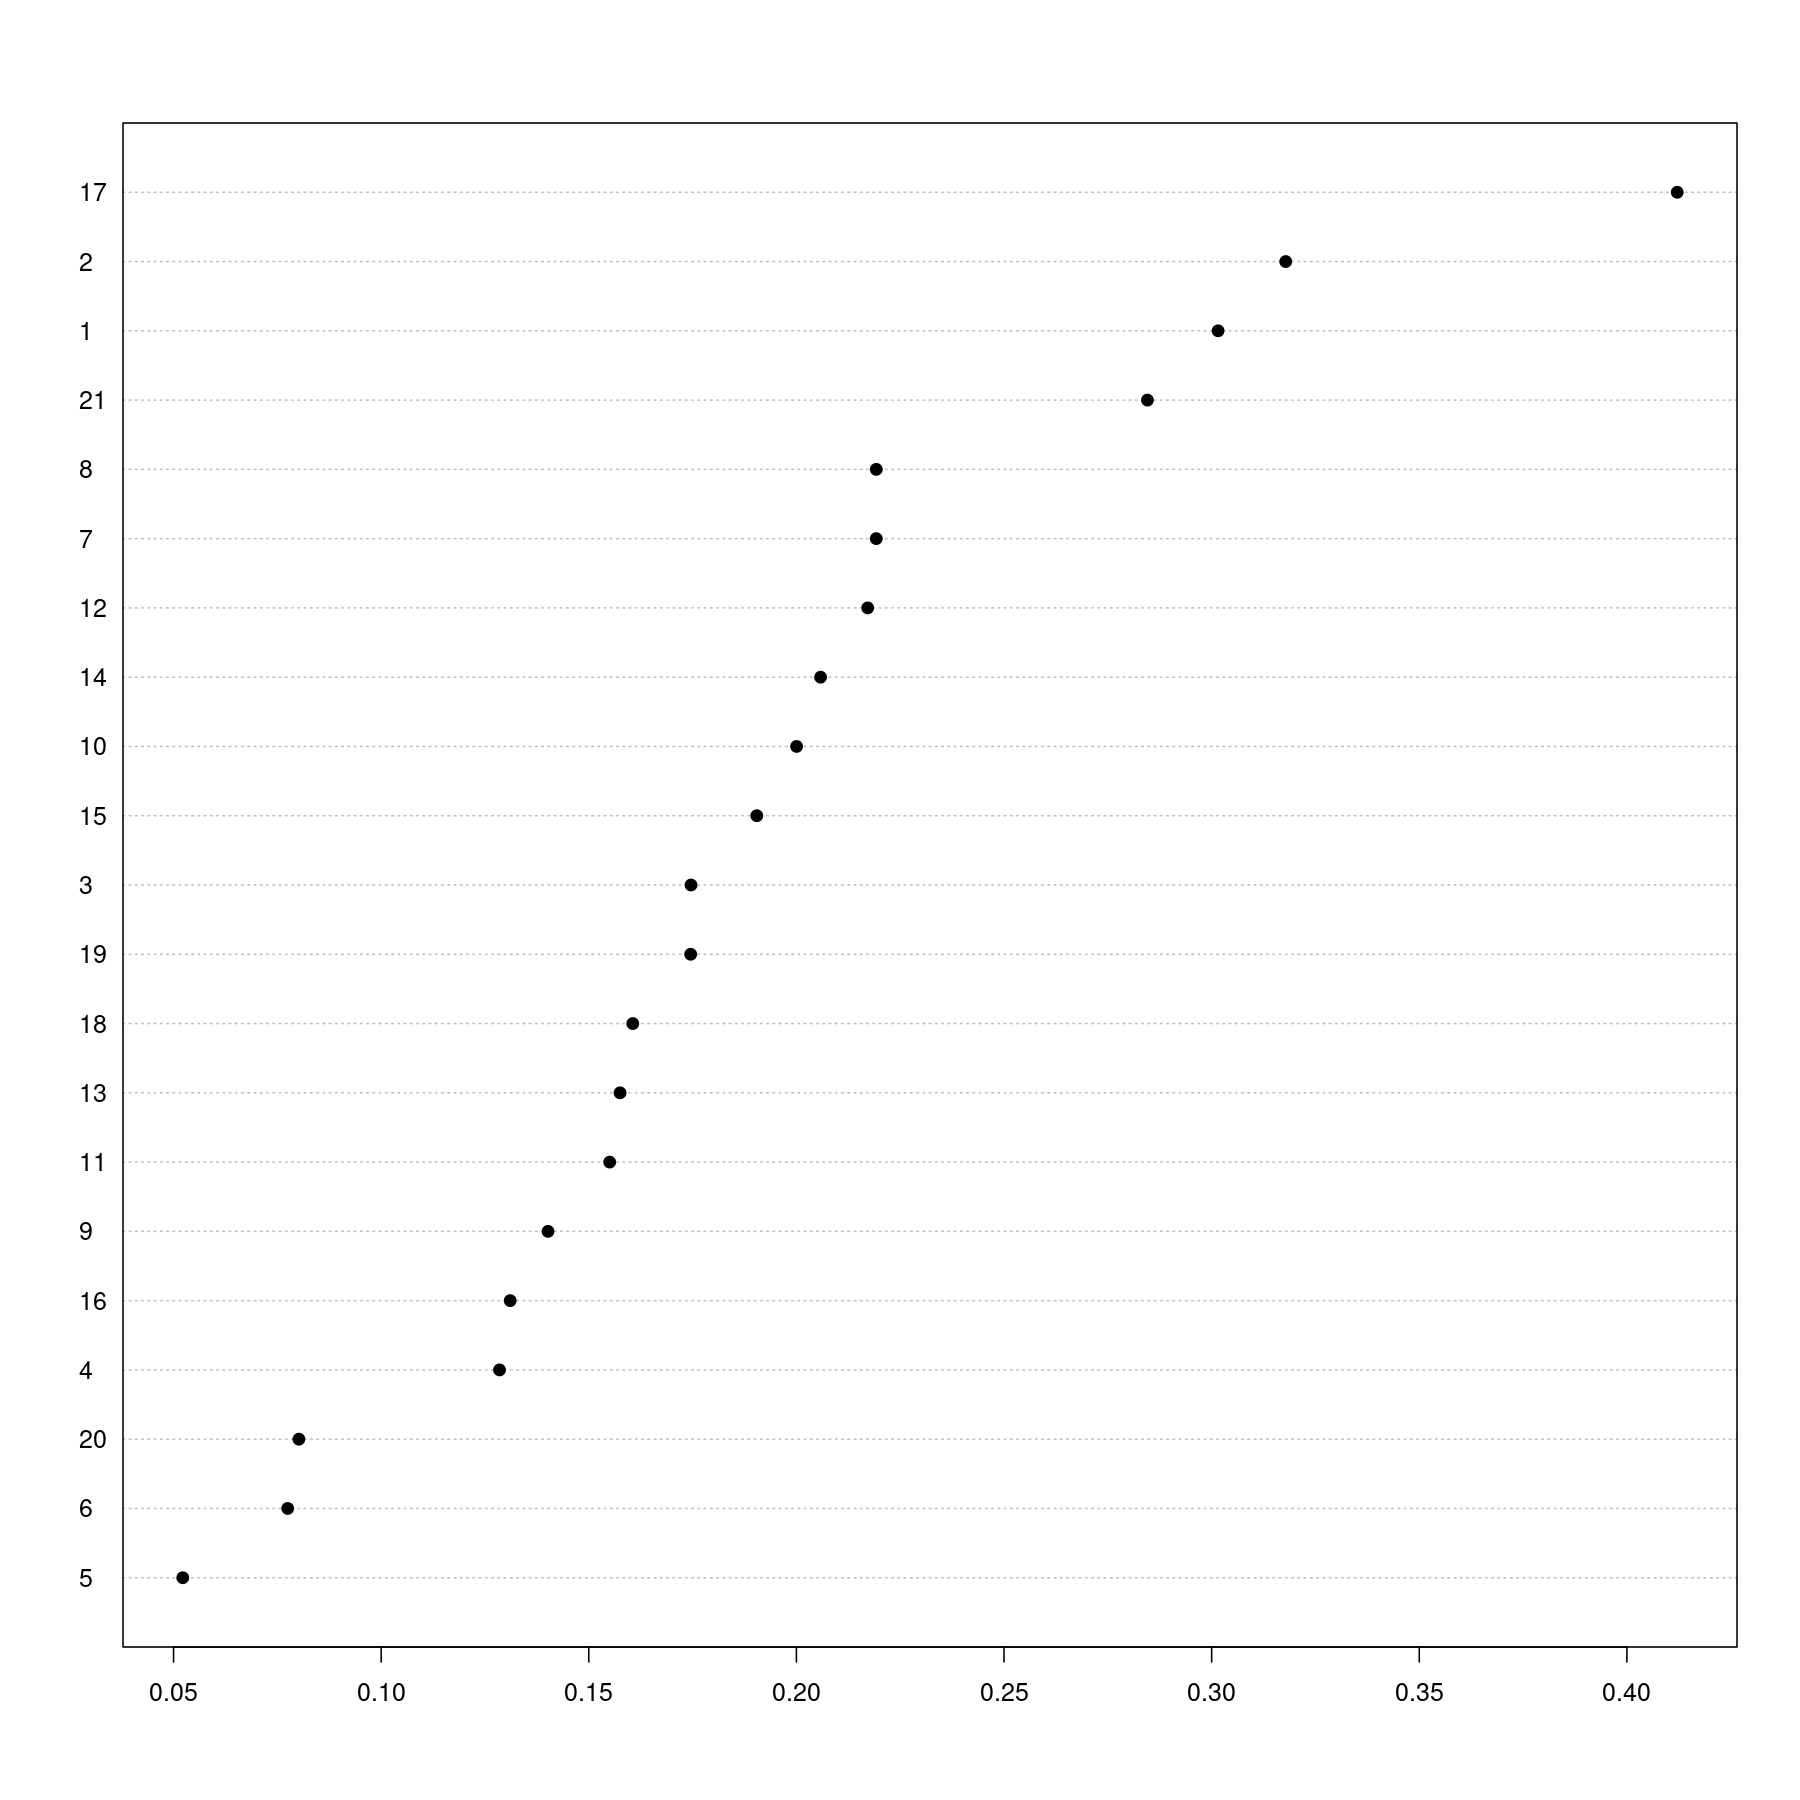

In [11]:
dotchart(sort(hatvalues(stack_model1)), pch = 19)

In [12]:
stack_model4 <- lm(stack.loss ~ ., data = stackloss[-c(17,21),])
summary(stack_model4)


Call:
lm(formula = stack.loss ~ ., data = stackloss[-c(17, 21), ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0658 -2.0279 -0.0319  1.1301  6.2421 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -41.5706    12.4732  -3.333  0.00454 ** 
Air.Flow      0.8859     0.1230   7.203 3.06e-06 ***
Water.Temp    0.8315     0.3392   2.452  0.02696 *  
Acid.Conc.   -0.1328     0.1585  -0.838  0.41539    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.647 on 15 degrees of freedom
Multiple R-squared:  0.9465,	Adjusted R-squared:  0.9358 
F-statistic: 88.48 on 3 and 15 DF,  p-value: 9.168e-10


## LMR 9.3 
Using the ozone data, fit a model with O3 as the response and temp, humidity and ibh as predictors. Use the Box–Cox method to determine the best transformation on the response.

In [13]:
ozone %>% head()

,O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,5710,4,28,40,2693,-25,87,250,33
2,5,5700,3,37,45,590,-24,128,100,34
3,5,5760,3,51,54,1450,25,139,60,35
4,6,5720,4,69,35,1568,15,121,60,36
5,4,5790,6,19,45,2631,-33,123,100,37
6,4,5790,3,25,55,554,-28,182,250,38


In [14]:
ozone_model1 <- lm(O3 ~ temp + humidity + ibh, data = ozone)
summary(ozone_model1)


Call:
lm(formula = O3 ~ temp + humidity + ibh, data = ozone)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5291  -3.0137  -0.2249   2.8239  13.9303 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.049e+01  1.616e+00  -6.492 3.16e-10 ***
temp         3.296e-01  2.109e-02  15.626  < 2e-16 ***
humidity     7.738e-02  1.339e-02   5.777 1.77e-08 ***
ibh         -1.004e-03  1.639e-04  -6.130 2.54e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.524 on 326 degrees of freedom
Multiple R-squared:  0.684,	Adjusted R-squared:  0.6811 
F-statistic: 235.2 on 3 and 326 DF,  p-value: < 2.2e-16


## LMR 9.8
Use the cars data with distance as the response and speed as the predictor.  
(a) Plot distance against speed.  
(b) Show a linear fit to the data on the plot.  
(c) Show a quadratic fit to the data one the plot.  
(d) Now use sqrt(dist) as the response and fit a linear model. Show the fit on the same plot.  
(e) Compute the default smoothing spline fit to the plot and display on a fresh plot of the data. How does it compare to the previous fits?

In [15]:
cars %>% head()

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


speed,dist,source,distance
<dbl>,<dbl>,<chr>,<dbl>
4,2,predicted_dist1,-1.849460
4,2,predicted_dist2,7.722637
4,2,predicted_dist3^2,6.587950
4,10,predicted_dist1,-1.849460
4,10,predicted_dist2,7.722637
4,10,predicted_dist3^2,6.587950


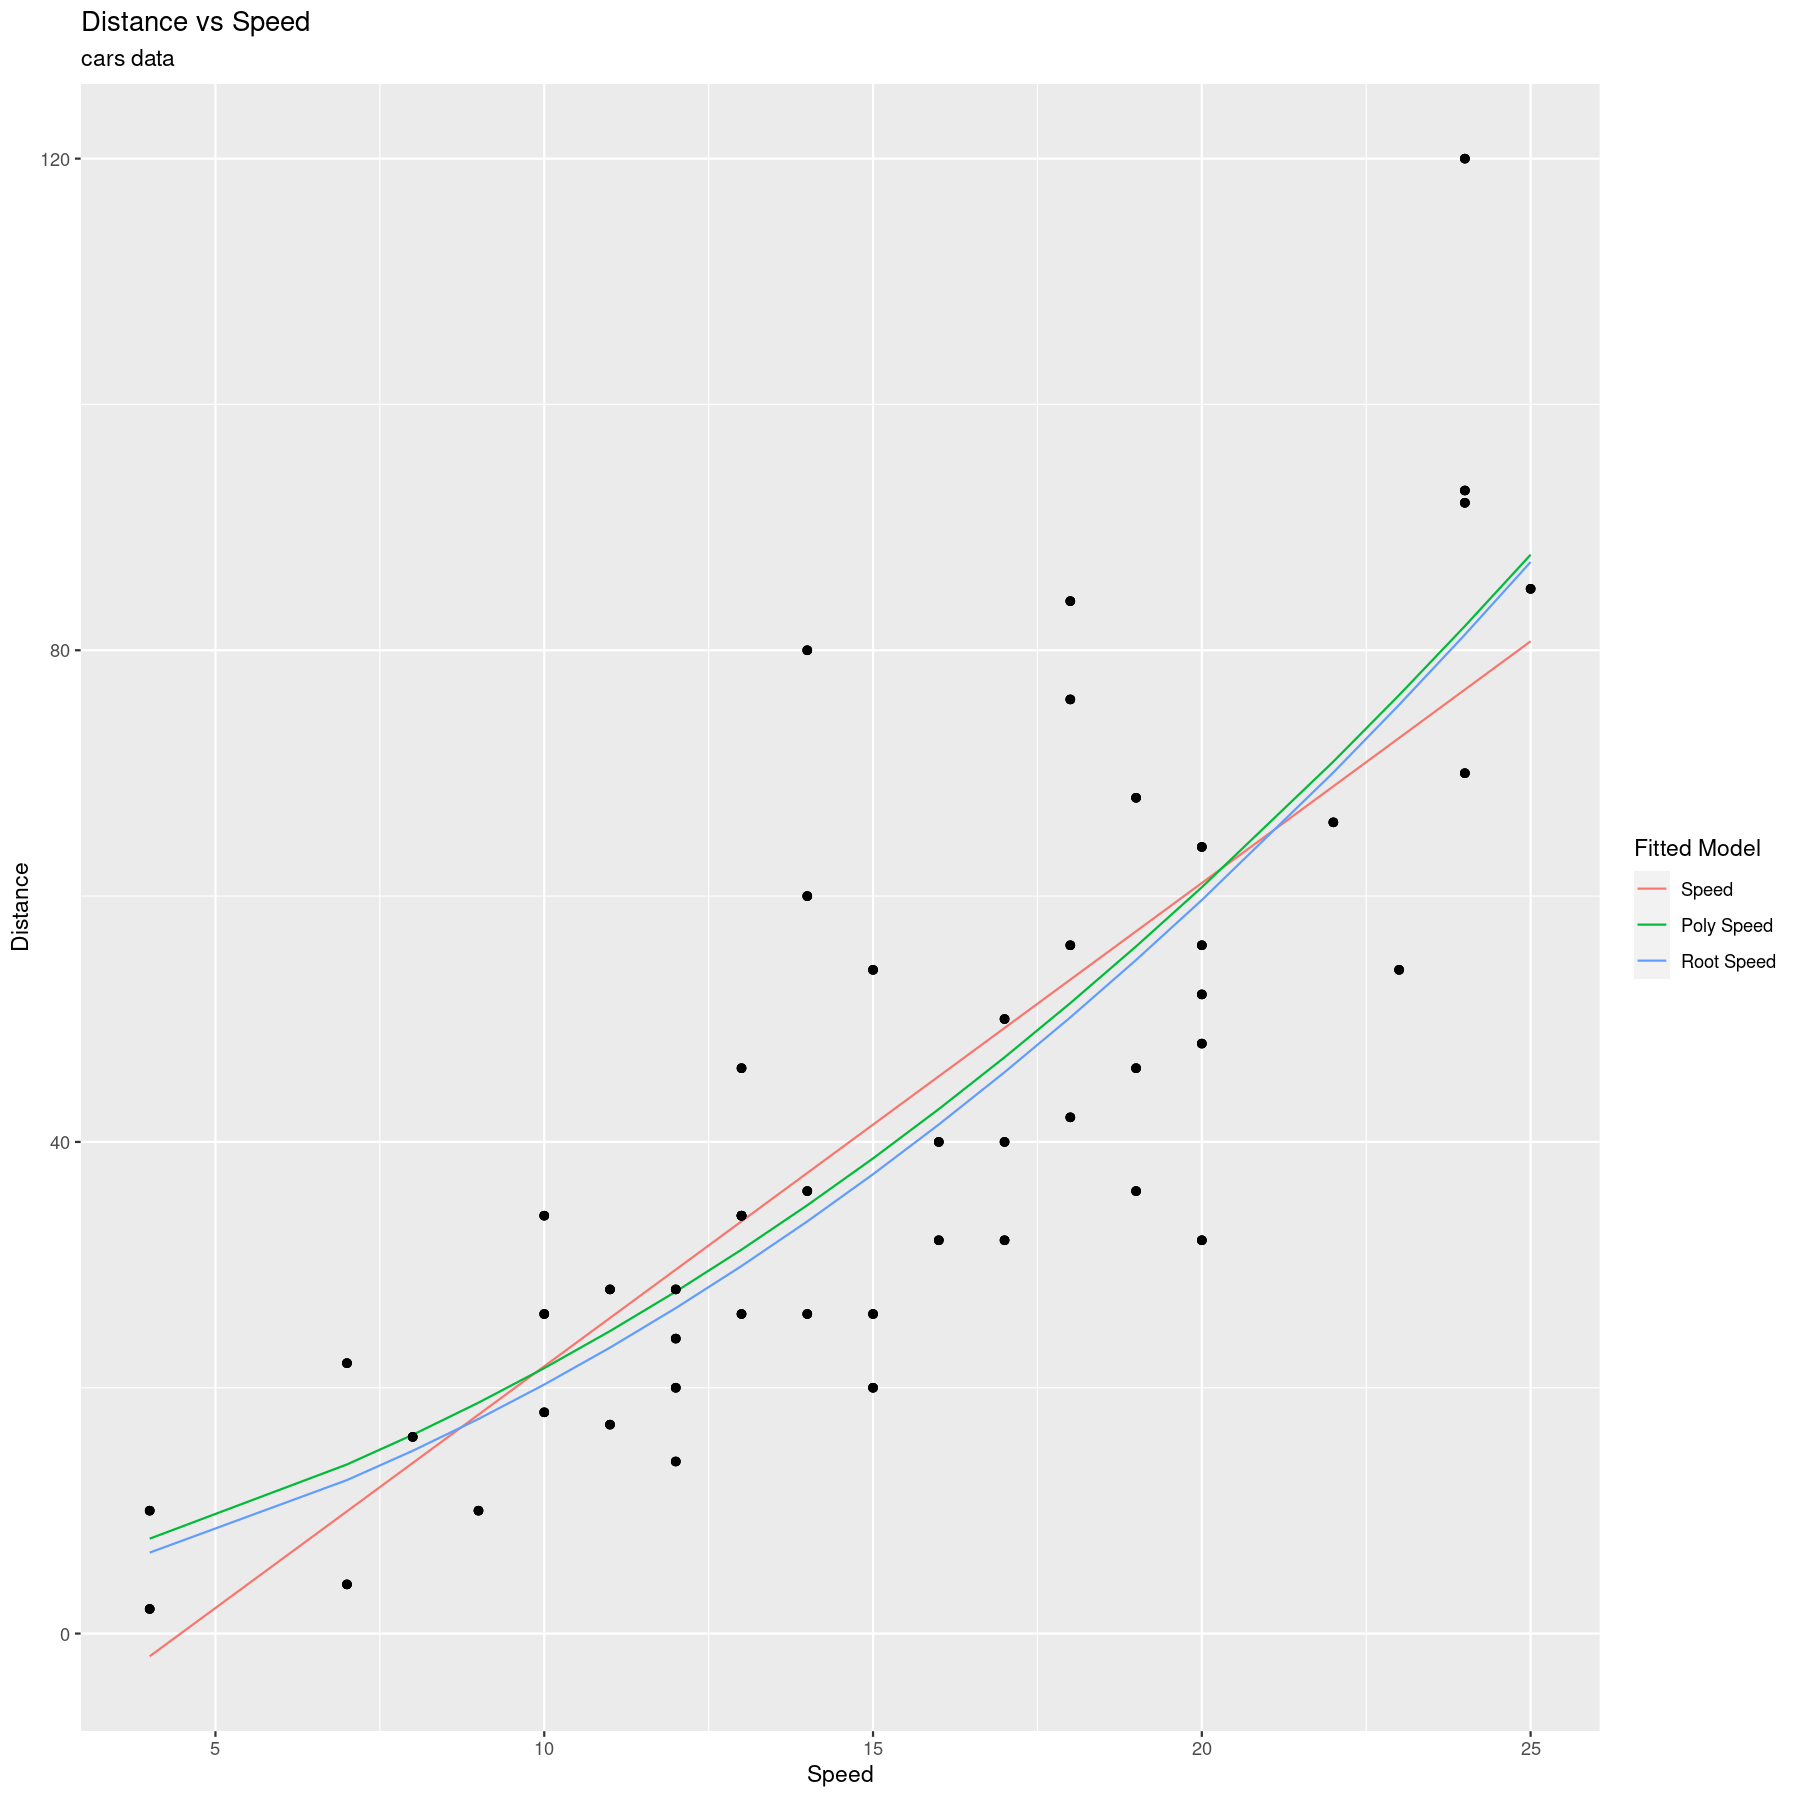

In [44]:
# a, b, c, d
cars_model1 <- lm(dist ~ speed, data = cars)
cars_model2 <- lm(dist ~ poly(speed,2), data = cars)
cars_model3 <- lm(sqrt(dist) ~ speed, data = cars)
predicted_dist1 <- predict(cars_model1, newdata = cars)
predicted_dist2 <- predict(cars_model2, newdata = cars)
predicted_dist3 <- predict(cars_model3, newdata = cars)

df_car <- tibble(cars, predicted_dist1, predicted_dist2, predicted_dist3^2)

df_car <- df_car %>% pivot_longer(!c(speed, dist), names_to = "source", values_to = "distance")

df_car %>% head()

df_car %>% ggplot() + 
    geom_line(aes(x = speed, y = distance, col = source)) + 
    geom_point(aes(x = speed, y = dist)) + 
    labs(x = "Speed", y = "Distance", 
         title = "Distance vs Speed", 
         subtitle = "cars data") +
    scale_color_discrete(labels=c("Speed","Poly Speed","Root Speed"),
                         name = "Fitted Model")

Call:
smooth.spline(x = speed, y = dist)

Smoothing Parameter  spar= 0.7801305  lambda= 0.1112206 (11 iterations)
Equivalent Degrees of Freedom (Df): 2.635278
Penalized Criterion (RSS): 4187.776
GCV: 244.1044

Warning message in xy.coords(x, y, xlabel, ylabel, log = log, recycle = TRUE):
“NAs introduced by coercion”
Warning message in xy.coords(x, y, xlabel, ylabel, log = log, recycle = TRUE):
“NAs introduced by coercion”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”


ERROR: Error in plot.window(...): need finite 'xlim' values


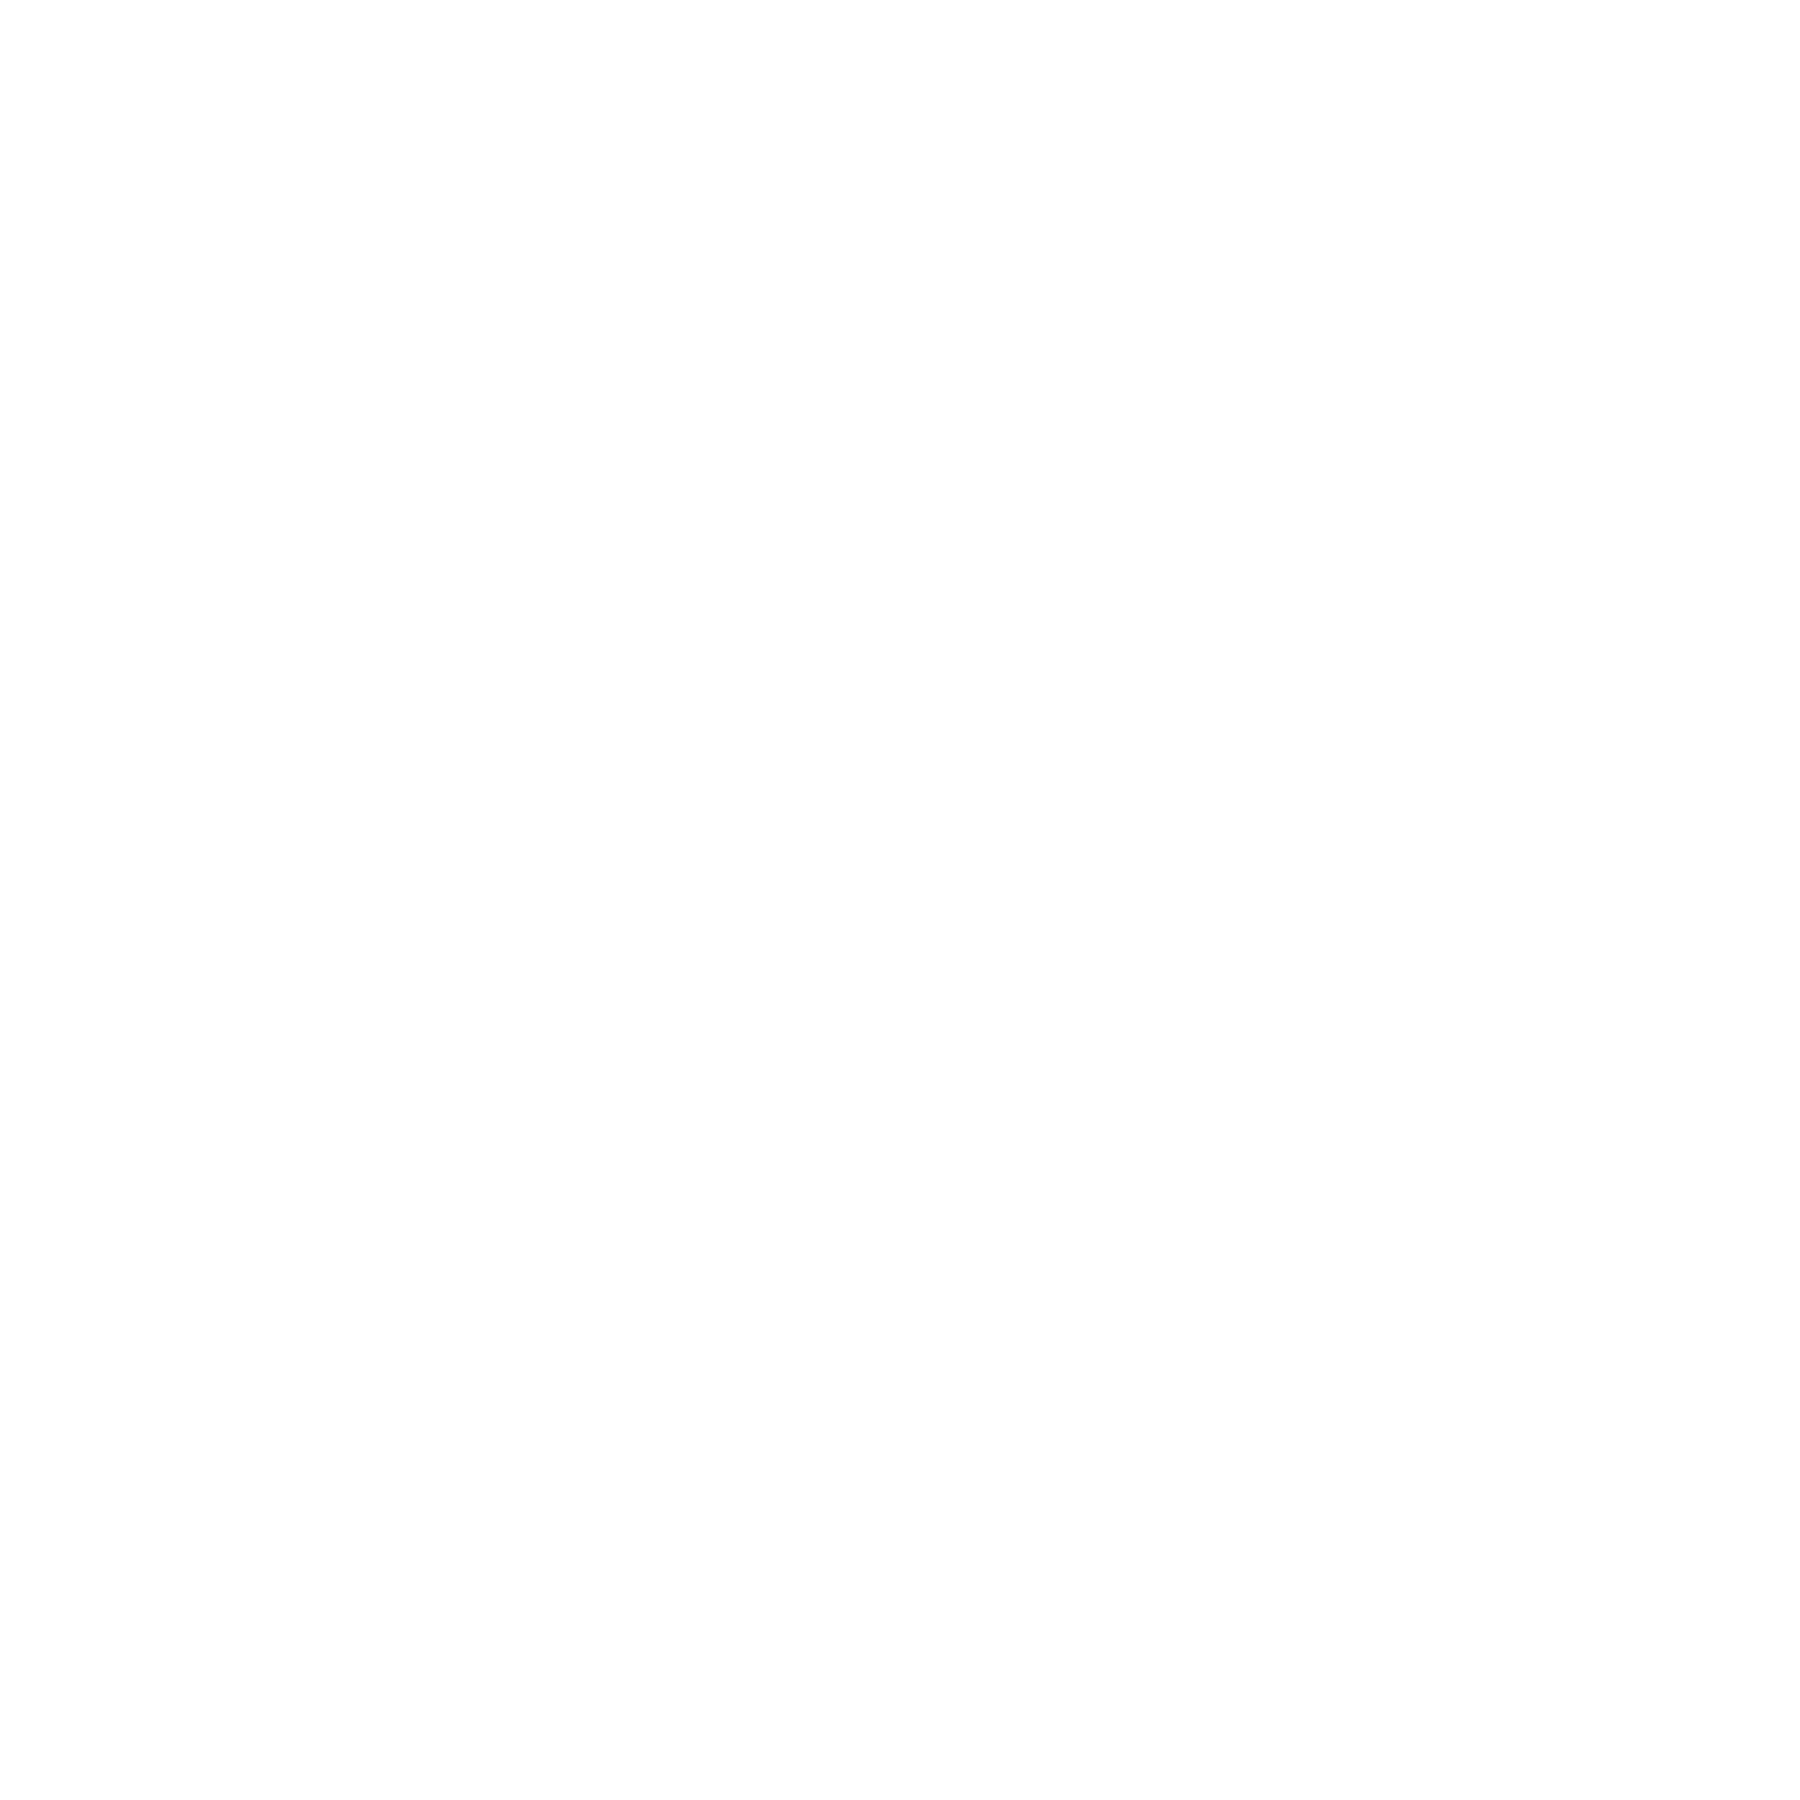

In [59]:
spline_model <- with(cars, smooth.spline(speed, dist))

spline_model
matplot("speed", cbind("dist", spline_model$dist))